In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import textblob
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [22]:
# Observe data
filename = '../input/natural-language-processing-with-disaster-tweets/kaggle nlp/train.csv'
data = pd.read_csv(filename)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


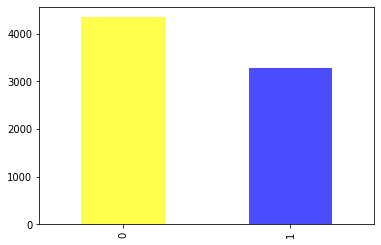

In [31]:
# Plot the label distribution
data['target'].value_counts().plot(kind='bar', color=['yellow', 'blue'], alpha=0.7)
plt.show()

In [32]:
# Normalize raw text data
def normalize_textual_data(text):
    
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    
    lower_string = text.lower()
    remove_numbers = re.sub(r'\d+','',lower_string)
    remove_punctuation = re.sub(r'[^\w\s]','', remove_numbers)
    remove_spaces = remove_punctuation.strip()
    split_text = remove_spaces.split()
    remove_unneeded_words = [stemmer.stem(word) for word in split_text if not word in stop_words and len(word)>2 and not word.startswith('http') and word.isalpha()]
    pos_tag_text = ' '.join([word for (word, tag) in nltk.pos_tag(remove_unneeded_words) if tag.startswith('NN') or tag.startswith('JJ')])
    
    return pos_tag_text

documents = []
tweets = pd.read_csv(filename)['text']
for tweet in range(len(tweets)):
    tweets[tweet] = normalize_textual_data(tweets[tweet])

In [36]:
# Fit the Bag of Words model
# Get unique words found in all the documents
# Unique words represent the features

vectorizer = CountVectorizer(max_features=1800)
array_of_text_data = np.array(tweets)
X_bow = vectorizer.fit_transform(array_of_text_data).toarray()
y_targets = pd.read_csv(filename)['target']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y_targets, test_size = 0.2)

Accuracy: 0.7898883782009193




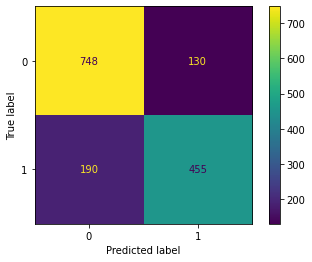

In [41]:
# Initialize a Naive Bayes classifier and fit it to the train data
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

# Make predictions on the test set and compute accuracy
y_pred_NB = classifier_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy: {accuracy_NB}")
print("\n")

# Create and plot the confusion matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=classifier_NB.classes_)
disp.plot()
plt.show()

Accuracy: 0.7839789888378201




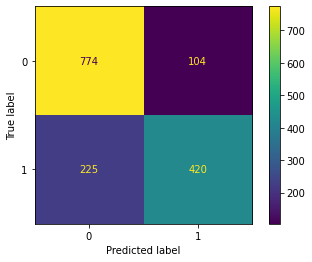

In [42]:
# Initialize a Support Vector Machine classifier and fit it to the train data
classifier_SVM = svm.SVC()
classifier_SVM.fit(X_train, y_train)

# Make predictions on the test set and compute accuracy
y_pred_SVM = classifier_SVM.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy: {accuracy_SVM}")
print("\n")

# Create and plot the confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM,display_labels=classifier_SVM.classes_)
disp.plot()
plt.show()